In [182]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

# Combine the data into a single dataset

# Display the data table for preview


In [183]:
city_data_raw= pd.read_csv(city_data_to_load)
city_data_df = pd.DataFrame(city_data_raw)
city_data_df.head()


city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban

In [184]:
ride_data_raw = pd.read_csv(ride_data_to_load)
ride_data_df = pd.DataFrame(ride_data_raw)
ride_data_df.head(20)

city                 date   fare        ride_id
0    Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
1    South Michelleport  2018-03-04 18:24:09  30.24  2343912425577
2    Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003
3            Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178
4            South Jack  2018-03-06 04:28:35  34.58  3908451377344
5          South Latoya  2018-03-11 12:26:48   9.52  1994999424437
6         New Paulville  2018-02-27 11:17:56  43.25   793208410091
7          Simpsonburgh  2018-04-26 00:43:24  35.98   111953927754
8       South Karenland  2018-01-08 03:28:48  35.09  7995623208694
9         North Jasmine  2018-03-09 06:26:29  42.81  5327642267789
10  New Kimberlyborough  2018-02-07 01:10:11   9.34  7992781920789
11          West Angela  2018-01-12 01:45:27  26.86  4820052223501
12           Rodneyfort  2018-03-02 18:03:20  44.26  2494064867705
13          West Angela  2018-01-10 12:17:31  12.74  2108723916092
14          Roberthaven  2018-05-04 14:48:56  25.66  1026197778354
15          North Jason  2018-03-28 22:28:44   9.19  7007022521141
16         Williamsview  2018-01-03 16:19:25  18.93  1979492913169
17              Leahton  2018-02-26 18:42:15   8.85  6966668662612
18         West Anthony  2018-03-06 02:27:01  10.02  9396763280782
19  New Kimberlyborough  2018-04-25 22:58:38  29.67  4823568522144

In [185]:
df = pd.merge(ride_data_df,city_data_df, on="city")
df.dropna()
df.head()

city                 date   fare        ride_id  \
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873   
1  Lake Jonathanshire  2018-04-07 20:51:11  31.25  4441251834598   
2  Lake Jonathanshire  2018-03-09 23:45:55  19.89  2389495660448   
3  Lake Jonathanshire  2018-04-07 18:09:21  24.28  7796805191168   
4  Lake Jonathanshire  2018-01-02 14:14:50  13.89   424254840012   

   driver_count   type  
0             5  Urban  
1             5  Urban  
2             5  Urban  
3             5  Urban  
4             5  Urban

In [186]:
#df_g = df.groupby("city")
df["Tot Numb Rides"]= df["type"].groupby(df["city"]).transform(len)
df["Tot Fare"] = df["fare"].groupby(df["city"]).transform(sum)
df["Avg Fare"] = df["Tot Fare"]/df["Tot Numb Rides"]


df.head()


city                 date   fare        ride_id  \
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873   
1  Lake Jonathanshire  2018-04-07 20:51:11  31.25  4441251834598   
2  Lake Jonathanshire  2018-03-09 23:45:55  19.89  2389495660448   
3  Lake Jonathanshire  2018-04-07 18:09:21  24.28  7796805191168   
4  Lake Jonathanshire  2018-01-02 14:14:50  13.89   424254840012   

   driver_count   type  Tot Numb Rides  Tot Fare   Avg Fare  
0             5  Urban              24    562.22  23.425833  
1             5  Urban              24    562.22  23.425833  
2             5  Urban              24    562.22  23.425833  
3             5  Urban              24    562.22  23.425833  
4             5  Urban              24    562.22  23.425833

In [187]:
df_red=df
del df_red["date"]
del df_red["fare"]
del df_red["ride_id"]
#del df_red["Tot Fare"]

df_red.head()



city  driver_count   type  Tot Numb Rides  Tot Fare  \
0  Lake Jonathanshire             5  Urban              24    562.22   
1  Lake Jonathanshire             5  Urban              24    562.22   
2  Lake Jonathanshire             5  Urban              24    562.22   
3  Lake Jonathanshire             5  Urban              24    562.22   
4  Lake Jonathanshire             5  Urban              24    562.22   

    Avg Fare  
0  23.425833  
1  23.425833  
2  23.425833  
3  23.425833  
4  23.425833

In [188]:
df_unique = df_red.drop_duplicates()
df_unique.reset_index(inplace=True,drop=True)

conditions=[(df_unique["type"]=="Urban"),
           (df_unique["type"]=="Suburban"),
           (df_unique["type"]=="Rural")]
choices=[1,2,3]

df_unique["Num Type"] = np.select(conditions,choices, default=0)

df_unique.head()

C:\Users\rauld\Anaconda2\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


city  driver_count   type  Tot Numb Rides  Tot Fare  \
0  Lake Jonathanshire             5  Urban              24    562.22   
1  South Michelleport            72  Urban              31    758.00   
2  Port Samanthamouth            57  Urban              25    641.07   
3          Rodneyfort            34  Urban              23    658.19   
4          South Jack            46  Urban              19    436.34   

    Avg Fare  Num Type  
0  23.425833         1  
1  24.451613         1  
2  25.642800         1  
3  28.616957         1  
4  22.965263         1

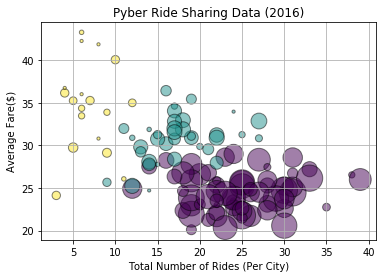

In [189]:
x=df_unique["Tot Numb Rides"]
y=df_unique["Avg Fare"]
s=df_unique["driver_count"]
tipo=df_unique["Num Type"]

plt.grid()
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.title("Pyber Ride Sharing Data (2016)")

plt.scatter(x,y,s=s*10,c=tipo, alpha=.5, edgecolors="black")

plt.show()


## Total Fares by City Type

In [190]:


df_unique["Tot Fare by C Type"]= df_unique["Tot Fare"].groupby(df_unique["type"]).transform(sum)
df_unique["Tot Rides by C Type"]= df_unique["Tot Numb Rides"].groupby(df_unique["type"]).transform(sum)
df_unique["Tot Drivers by C Type"]= df_unique["driver_count"].groupby(df_unique["type"]).transform(sum)

df_unique.head(100)


C:\Users\rauld\Anaconda2\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rauld\Anaconda2\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\rauld\Anaconda2\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

city  driver_count      type  Tot Numb Rides  Tot Fare  \
0    Lake Jonathanshire             5     Urban              24    562.22   
1    South Michelleport            72     Urban              31    758.00   
2    Port Samanthamouth            57     Urban              25    641.07   
3            Rodneyfort            34     Urban              23    658.19   
4            South Jack            46     Urban              19    436.34   
5          South Latoya            10     Urban              19    381.77   
6         New Paulville            44     Urban              22    476.87   
7          Simpsonburgh            21     Urban              24    560.54   
8       South Karenland             4     Urban              38   1008.35   
9         North Jasmine            33     Urban              30    756.16   
10  New Kimberlyborough            33     Urban              30    677.67   
11          West Angela            48     Urban              39   1013.61   
12          Roberthaven            47     Urban              24    569.50   
13          North Jason             6     Urban              35    796.03   
14         Williamsview            46     Urban              20    531.98   
15              Leahton            17     Urban              21    446.12   
16         West Anthony            70     Urban              30    742.10   
17          New Paulton            44     Urban              19    528.58   
18  West Patrickchester            25     Urban              16    451.73   
19            Deanville            49     Urban              19    491.01   
20      West Josephberg            45     Urban              26    564.73   
21     West Samuelburgh            73     Urban              25    544.19   
22           West Heidi            28     Urban              28    647.75   
23            Loganberg            23     Urban              28    708.19   
24          Huntermouth            37     Urban              24    695.85   
25          Grahamburgh            61     Urban              25    630.53   
26           Port Frank            23     Urban              33    897.65   
27      East Kaylahaven            65     Urban              29    688.98   
28          West Robert            39     Urban              31    778.84   
29       North Markport            22     Urban              14    385.06   
..                  ...           ...       ...             ...       ...   
70          West Hannah            12  Suburban              21    620.50   
71       East Marymouth             5  Suburban              27    832.55   
72          New Raymond            17  Suburban              22    615.16   
73      Lake Robertside             4  Suburban              25    781.55   
74           Josephside            25  Suburban              27    887.17   
75          Brandonfort            10  Suburban              19    673.31   
76            Lewisland             4  Suburban              17    588.44   
77   North Richardhaven             1  Suburban              14    345.86   
78           New Olivia            20  Suburban              17    578.92   
79      New Shannonberg            20  Suburban              17    482.43   
80        Nicolechester            19  Suburban              19    587.28   
81         Victoriaport            16  Suburban              14    388.92   
82         South Teresa            21  Suburban              22    686.85   
83       East Aaronbury             7  Suburban               9    230.95   
84          Bethanyland            22  Suburban              18    593.21   
85           Lake Scott            23  Suburban              18    573.95   
86        North Jeffrey            11  Suburban              13    380.15   
87        Rodriguezview            20  Suburban              15    461.18   
88            Sotoville            10  Suburban              11    351.78   
89         South Brenda             1  Suburban              24    815.15   
90           Po

In [191]:
df_ct = df_unique

del df_ct["city"]
del df_ct["driver_count"]
del df_ct["Tot Fare"]
del df_ct["Avg Fare"]
del df_ct["Num Type"]
del df_ct["Tot Numb Rides"]

df_ct.drop_duplicates()

df_ct.head()

type  Tot Fare by C Type  Tot Rides by C Type  Tot Drivers by C Type
0  Urban            39854.38                 1625                   2405
1  Urban            39854.38                 1625                   2405
2  Urban            39854.38                 1625                   2405
3  Urban            39854.38                 1625                   2405
4  Urban            39854.38                 1625                   2405

In [192]:
df_ct.drop_duplicates(inplace=True)
df_ct.sort_values(by=["Tot Fare by C Type"], ascending=True, inplace=True)
df_ct.head()

C:\Users\rauld\Anaconda2\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\rauld\Anaconda2\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


type  Tot Fare by C Type  Tot Rides by C Type  Tot Drivers by C Type
102     Rural             4327.93                  125                     78
66   Suburban            19356.33                  625                    490
0       Urban            39854.38                 1625                   2405

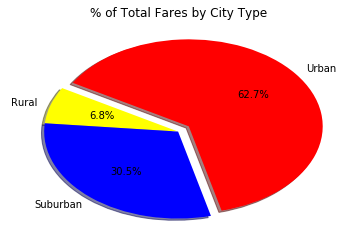

In [193]:
plt.pie( df_ct["Tot Fare by C Type"], labels=df_ct["type"] ,shadow=True , explode = (0,0,.1), 
        startangle=150, colors=("yellow","blue","red"), autopct='%1.1f%%' )
plt.title("% of Total Fares by City Type")
plt.show()

## Total Rides by City Type

In [194]:
plt.pie( df_ct["Tot Rides by C Type"], labels=df_ct["type"] ,shadow=True , explode = (0,0,.1), 
        startangle=150, colors=("yellow","blue","red"), autopct='%1.1f%%' )
plt.title("% of Total Rides by City Type")
plt.show()

## Total Drivers by City Type

In [195]:
plt.pie( df_ct["Tot Drivers by C Type"], labels=df_ct["type"] ,shadow=True , explode = (0,0,.1), 
        startangle=150, colors=("yellow","blue","red"), autopct='%1.1f%%' )
plt.title("% of Total Drivers by City Type")
plt.show()